# Graph Visualization
1.-Load a graph of your choosing from a text file or other source into a graph database or NetworkX.  If you take a large network dataset from the web (such as fromhttps://snap.stanford.edu/data/), please feel free at this point to load just a small subset of the nodes and edges.
2.-Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing.  You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package. 
3.- Use a visualization tool of your choice ( NetworkX, Neo4j, Gephi, etc.) to display information.

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import requests
import io
import numpy as np
import collections

In [14]:
data_folder = "https://github.com/jgarcia71/Data-620-Assignments-Spring-2019/blob/master/Assignment%20Week%203/"
Team_url = data_folder + "Teams.csv?raw=true"
Team_content = requests.get(Team_url).content
Team_csv = pd.read_csv(io.StringIO(Team_content.decode('utf-8')))

In [6]:
Team_csv["yearID"] = Team_csv["yearID"].apply(str)

In [7]:
print(Team_csv.head())

  yearID lgID teamID franchID divID  Rank  Ghome DivWin WCWin LgWin WSWin  \
0   1871  NaN    BS1      BNA   NaN     3    NaN    NaN   NaN     N   NaN   
1   1871  NaN    CH1      CNA   NaN     2    NaN    NaN   NaN     N   NaN   
2   1871  NaN    CL1      CFC   NaN     8    NaN    NaN   NaN     N   NaN   
3   1871  NaN    FW1      KEK   NaN     7    NaN    NaN   NaN     N   NaN   
4   1871  NaN    NY2      NNA   NaN     5    NaN    NaN   NaN     N   NaN   

                      name                          park  attendance  BPF  \
0     Boston Red Stockings           South End Grounds I         NaN  103   
1  Chicago White Stockings       Union Base-Ball Grounds         NaN  104   
2   Cleveland Forest Citys  National Association Grounds         NaN   96   
3     Fort Wayne Kekiongas                Hamilton Field         NaN  101   
4         New York Mutuals      Union Grounds (Brooklyn)         NaN   90   

   PPF teamIDBR teamIDlahman45 teamIDretro  
0   98      BOS            BS

In [8]:
Team_pairs = Team_csv[["yearID", "franchID"]].copy()
Team_pairs["edges"] = Team_pairs.apply(lambda x: (x["yearID"], x["franchID"]), axis=1)

In [9]:
G = nx.DiGraph()
G.add_edges_from(Team_pairs["edges"].tolist())
G.add_nodes_from(Team_csv["yearID"].tolist()+Team_csv["franchID"].tolist())

In [10]:
pos = nx.spring_layout(G,k=1.55,iterations=60)

In [11]:
pos_labels = {}
keys = pos.keys()
for key in keys:
    x, y = pos[key]
    pos_labels[key] = (x, y)

In [12]:
for node in Team_csv["franchID"].tolist():
    G.node[node]["category"] = "franchise"
for node in Team_csv["yearID"].tolist():
    G.node[node]["category"] = "year"
color_map = {
    "franchise": "lightblue",
    "year": "gray"
}

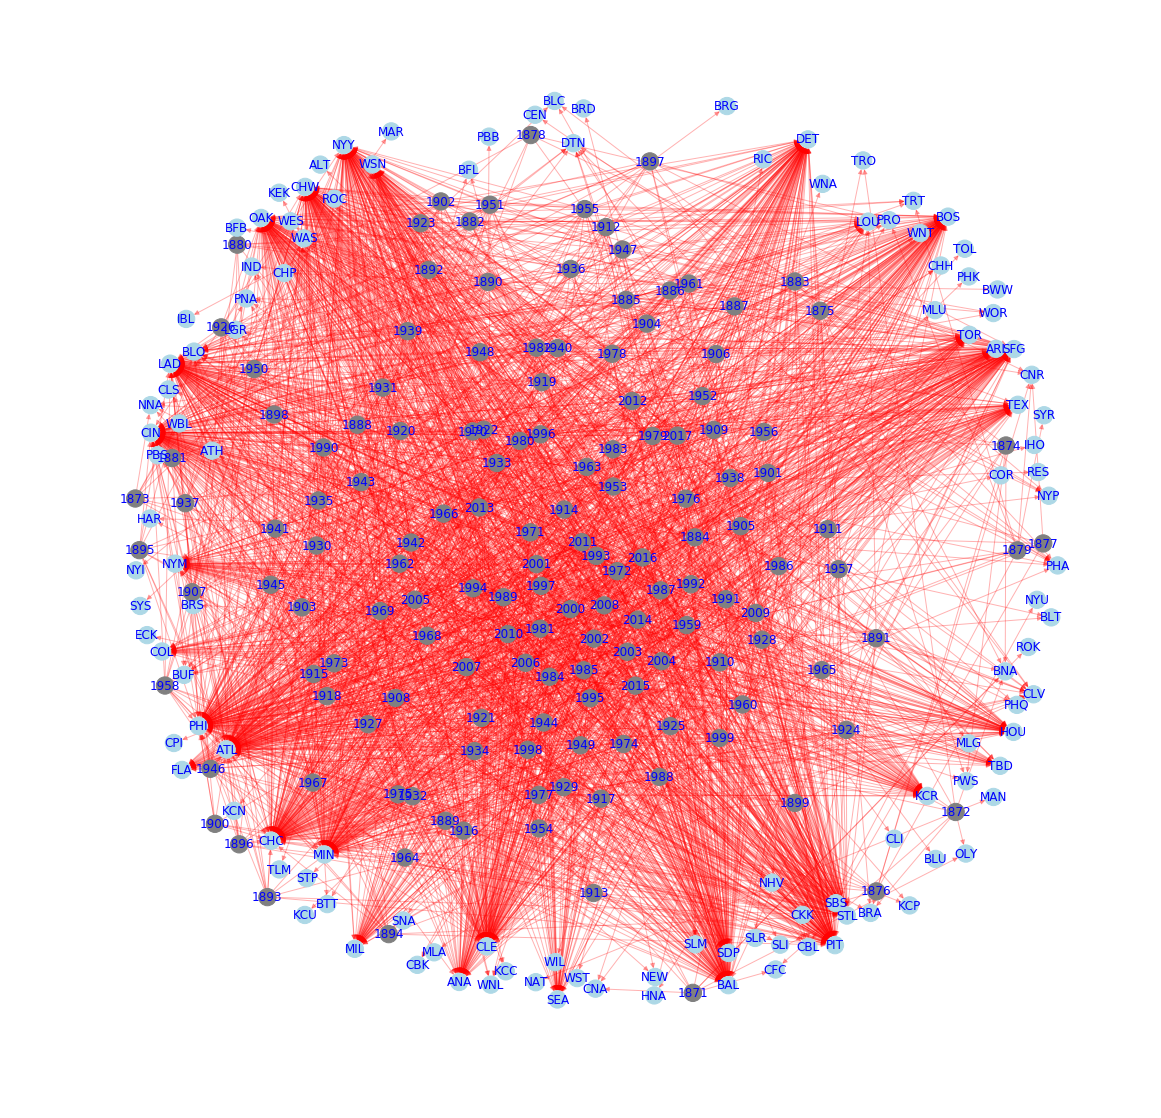

In [13]:
plt.figure(figsize=(20,20))
nx.draw_networkx_labels(G, pos=pos_labels, font_color='Blue')
nx.draw_networkx_edges(G, pos, edge_color="red", alpha=0.3)
nx.draw_networkx_nodes(G, pos, node_color=[color_map[G.node[node]['category']] for node in G], node_size=300)
plt.axis('off')
plt.show()

In [15]:
G_undirected = G.to_undirected()
try:
    nx.diameter(G_undirected)
except Exception as e:
    print(e)
    print("The total of " + str(len(list(nx.isolates(G_undirected)))) + " isolated nodes")

Found infinite path length because the graph is not connected
The total of 0 isolated nodes
